In [94]:
import numpy as np
import pandas as pd

In [96]:
def convert_pressure(pressure_str):
    # Split the string into the main number and the "--xx" part
    main, div = pressure_str.split("--")
    main = (int(main)-10.8) * 100  # Convert main part to Pascals
    div = int(div) * 20  # Convert division part to Pascals
    return main+div

df = pd.read_csv('Lab-04.csv')

df["Static Pressure"] = df["Static Pressure"].apply(convert_pressure)


In [98]:
Pinf = '12--2'
def get_Ps_pinf(value):
    return value - convert_pressure('12--2')
df['Ps - Pinf'] = df['Static Pressure'].apply(get_Ps_pinf)
dynamic_pressure =   convert_pressure('16--4') - convert_pressure(Pinf)
df

,Theta (in degrees),Static Pressure,Ps - Pinf
0,0,560.0,400.0
1,10,520.0,360.0
2,20,420.0,260.0
3,30,220.0,60.0
4,40,20.0,-140.0
5,50,-120.0,-280.0
6,60,-380.0,-540.0
7,70,-400.0,-560.0
8,80,-360.0,-520.0
9,90,-380.0,-540.0


    Theta (degrees)  Ps - Pinf  Dynamic Pressure (q)  \
0                 0      400.0                 440.0   
1                10      360.0                 440.0   
2                20      260.0                 440.0   
3                30       60.0                 440.0   
4                40     -140.0                 440.0   
5                50     -280.0                 440.0   
6                60     -540.0                 440.0   
7                70     -560.0                 440.0   
8                80     -520.0                 440.0   
9                90     -540.0                 440.0   
10              100     -500.0                 440.0   
11              110     -500.0                 440.0   
12              120     -540.0                 440.0   
13              130     -540.0                 440.0   
14              140     -540.0                 440.0   
15              150     -480.0                 440.0   
16              160     -480.0                 4

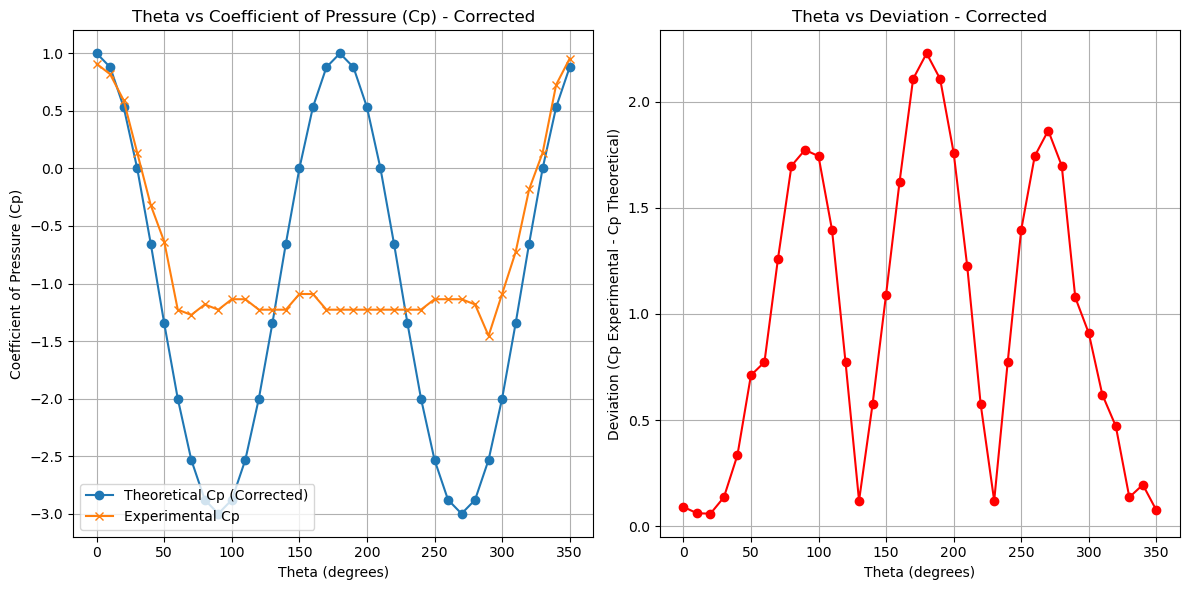

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file (ensure the file is in the same directory)
input_file = "input_data.csv"  # Replace with your input file name
data = df

# Extract theta and Ps - Pinf from the input CSV
theta_degrees = data["Theta (in degrees)"].values
ps_pinf = data["Ps - Pinf"].values

# Constants
rho = 0.784

# Corrected dynamic pressure value
dynamic_pressure_corrected = dynamic_pressure

# Calculate velocity using the corrected dynamic pressure
velocity_corrected = np.sqrt(2 * dynamic_pressure_corrected / rho)

# Theoretical Cp based on potential flow theory (corrected)
theta_radians = np.radians(theta_degrees)
cp_theoretical_corrected = (1 - (4 * (np.sin(theta_radians))**2))

# Experimental Cp
cp_experimental = ps_pinf / dynamic_pressure_corrected

# Deviation (Error)
cp_error_corrected = abs(cp_experimental - cp_theoretical_corrected)

# Create a DataFrame for the final observation table
final_data = {
    "Theta (degrees)": theta_degrees,
    "Ps - Pinf": ps_pinf,
    "Dynamic Pressure (q)": [dynamic_pressure_corrected] * len(theta_degrees),
    "Cp Theoretical (Corrected)": cp_theoretical_corrected,
    "Cp Experimental": cp_experimental,
    "Error (Cp Exp - Cp Theo)": cp_error_corrected
}
final_df = pd.DataFrame(final_data)

# Save the final observation table to a CSV file
output_file = "final_observation_table.csv"  # Replace with your desired output file name
final_df.to_csv(output_file, index=False)

# Display the final observation table in the console
print(final_df)

# Plotting the updated graphs
plt.figure(figsize=(12, 6))

# Theta vs Cp plot
plt.subplot(1, 2, 1)
plt.plot(theta_degrees, cp_theoretical_corrected, label='Theoretical Cp (Corrected)', marker='o')
plt.plot(theta_degrees, cp_experimental, label='Experimental Cp', marker='x')
plt.title('Theta vs Coefficient of Pressure (Cp) - Corrected')
plt.xlabel('Theta (degrees)')
plt.ylabel('Coefficient of Pressure (Cp)')
plt.legend()
plt.grid()

# Theta vs Deviation plot
plt.subplot(1, 2, 2)
plt.plot(theta_degrees, cp_error_corrected, label='Deviation (Corrected)', color='red', marker='o')
plt.title('Theta vs Deviation - Corrected')
plt.xlabel('Theta (degrees)')
plt.ylabel('Deviation (Cp Experimental - Cp Theoretical)')
plt.grid()

plt.tight_layout()
plt.show()


199.99999999999994

In [54]:
df

,Theta (in degrees),Static Pressure,Ps - Pinf
0,0,560.0,360.0
1,10,520.0,320.0
2,20,420.0,220.0
3,30,220.0,20.0
4,40,20.0,-180.0
5,50,-120.0,-320.0
6,60,-380.0,-580.0
7,70,-400.0,-600.0
8,80,-360.0,-560.0
9,90,-380.0,-580.0


In [92]:
final_df

,Theta (degrees),Ps - Pinf,Dynamic Pressure (q),Cp Theoretical (Corrected),Cp Experimental,Error (Cp Exp - Cp Theo)
0,0,400.0,400.0,1.000000e+00,1.00,0.000000
1,10,360.0,400.0,8.793852e-01,0.90,0.020615
2,20,260.0,400.0,5.320889e-01,0.65,0.117911
3,30,60.0,400.0,2.220446e-16,0.15,0.150000
4,40,-140.0,400.0,-6.527036e-01,-0.35,0.302704
5,50,-280.0,400.0,-1.347296e+00,-0.70,0.647296
6,60,-540.0,400.0,-2.000000e+00,-1.35,0.650000
7,70,-560.0,400.0,-2.532089e+00,-1.40,1.132089
8,80,-520.0,400.0,-2.879385e+00,-1.30,1.579385
9,90,-540.0,400.0,-3.000000e+00,-1.35,1.650000
